In [13]:
# in clustr there is no dependend variable

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import joblib

import  warnings
warnings.filterwarnings("ignore")

# load dataset

In [14]:
dataset = pd.read_csv(r"C:\Users\AR ANSARI\NIT\ML\spyder\ML cluster\Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),k-mea
0,1,Male,19,15,39,NaN
1,2,Male,21,15,81,NaN
2,3,Female,20,16,6,NaN
3,4,Female,23,16,77,NaN
4,5,Female,31,17,40,NaN
...,...,...,...,...,...,...
195,196,Female,35,120,79,NaN
196,197,Female,45,126,28,NaN
197,198,Male,32,126,74,NaN
198,199,Male,32,137,18,NaN


# using Annual income & spending score

In [15]:
x = dataset.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# scaling Elobw Method to find optimal K

  File "c:\Users\AR ANSARI\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\AR ANSARI\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\AR ANSARI\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\AR ANSARI\anaconda3

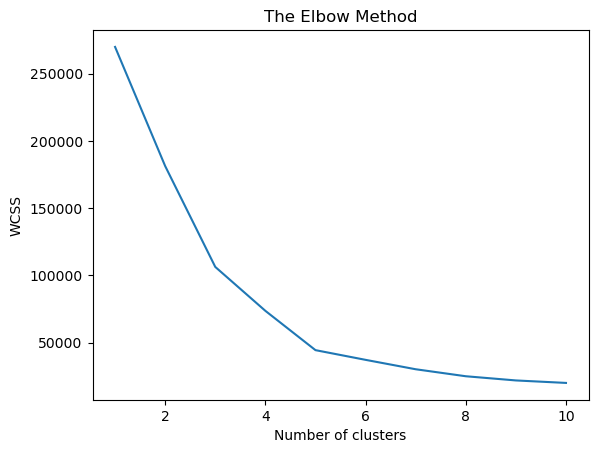

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(x)  # Make sure X is your dataset
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Train model 

In [17]:
Kmeans = KMeans(n_clusters=5, init = 'k-means++' , random_state= 0)
y_kmeans =  Kmeans.fit_predict(x)

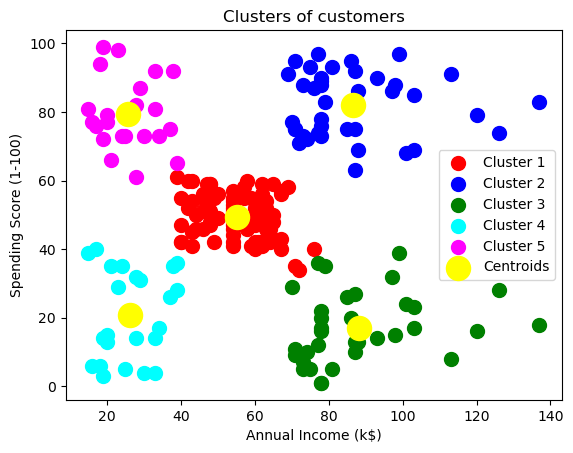

In [18]:
# Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


# final data

In [19]:
dataset['cluster'] = y_kmeans
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),k-mea,cluster
0,1,Male,19,15,39,NaN,3
1,2,Male,21,15,81,NaN,4
2,3,Female,20,16,6,NaN,3
3,4,Female,23,16,77,NaN,4
4,5,Female,31,17,40,NaN,3
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,NaN,1
196,197,Female,45,126,28,NaN,2
197,198,Male,32,126,74,NaN,1
198,199,Male,32,137,18,NaN,2


# save model & scaler

In [21]:
joblib.dump(kmeans, 'Kmeans_model.pkl')
#joblib.dump(scaler, 'scaler.pkl')

['Kmeans_model.pkl']